We are working together on this via vscode live share and are talking over zoom. 
In terms of sharing the file we have a github repository set up. We met three times to work in total.


In [67]:
import pandas as pd
import bs4
from bs4 import BeautifulSoup
import requests
from datetime import datetime as dt
import numpy as np
import re

In [68]:
#2
url = "https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares"
webpage = requests.get(url)
print(webpage) #response 403, this means that the webserver refused to authorize the request
#to fix do this 
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
webpage = requests.get(url, headers=headers)
print(webpage) #now response 200
soup_content = BeautifulSoup(webpage.content,'html.parser')
pretty = soup_content.prettify()
#print(pretty)
table_html = soup_content.find("table",{"class":"table table-striped"})#['data-value'] #from stackoverflow
df = pd.read_html(table_html.prettify())[0]
df.rename(columns={'Unnamed: 0':"rank",'Unnamed: 1':"x_class",'Unnamed: 2':"date",'Start':"start_time",'Maximum':"max_time",'End':"end_time",'Unnamed: 7':"movie",'Region':"region"},inplace=True)
df.head()


<Response [403]>
<Response [200]>


,rank,x_class,date,region,start_time,max_time,end_time,movie
0,1,X28+,2003/11/04,486,19:29,19:53,20:06,Movie View archive
1,2,X20+,2001/04/02,9393,21:32,21:51,22:03,Movie View archive
2,3,X17.2+,2003/10/28,486,09:51,11:10,11:24,Movie View archive
3,4,X17+,2005/09/07,808,17:17,17:40,18:03,Movie View archive
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,Movie View archive


In [69]:
dataFrame = df.drop("movie",axis=1)
dataFrame.head()

for row in dataFrame.iterrows():
    date = pd.to_datetime(row[1].date)
    time_start = pd.to_datetime(row[1].start_time)
    str_time = str(date)[:11]+str(time_start)[11:]
    startTime = pd.to_datetime(str_time)
    dataFrame.at[row[0],'start_time'] = startTime
    
    time_max= pd.to_datetime(row[1].max_time)
    str_time = str(date)[:11]+str(time_max)[11:]
    maxTime = pd.to_datetime(str_time)
    dataFrame.at[row[0],'max_time'] = maxTime
    
    time_end = pd.to_datetime(row[1].end_time)
    str_time = str(date)[:11]+str(time_end)[11:]
    endTime = pd.to_datetime(str_time)
    dataFrame.at[row[0],'end_time'] = endTime
    #date_time_obj = dt.strftime(str_time, '%y-%m-%d %H:%M:%S')
    #dt.combine(date,time_start)
dataFrame = dataFrame.replace('-',np.nan)
dataFrame_update = dataFrame.drop("date",axis=1)
dataFrame_update.rename(columns={'start_time':'start_datetime','max_time':'max_datetime','end_time':'end_datetime'},inplace=True)
region_column = dataFrame_update.region
dataFrame_update=dataFrame_update.drop(['region'],axis=1)
dataFrame_update['region'] = region_column
dataFrame_update.start_datetime = dataFrame_update.start_datetime.astype('datetime64[ns]')
dataFrame_update.max_datetime = dataFrame_update.max_datetime.astype('datetime64[ns]')
dataFrame_update.end_datetime = dataFrame_update.end_datetime.astype('datetime64[ns]')
print(dataFrame_update.dtypes)
dataFrame_update



rank                       int64
x_class                   object
start_datetime    datetime64[ns]
max_datetime      datetime64[ns]
end_datetime      datetime64[ns]
region                     int64
dtype: object


,rank,x_class,start_datetime,max_datetime,end_datetime,region
0,1,X28+,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,486
1,2,X20+,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393
2,3,X17.2+,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,486
3,4,X17+,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,808
4,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415
5,6,X10,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,486
6,7,X9.4,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,8100
7,8,X9.3,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,2673
8,9,X9,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,930
9,10,X8.3,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,486


In [70]:
#Step 3
url = "http://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html"
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
webpage = requests.get(url, headers=headers)
soup_content = BeautifulSoup(webpage.content,'html.parser')
#pretty = soup_content.prettify()
#print(pretty)
row_split = soup_content.find("pre").prettify().split('\n') 


In [71]:
colomns = []
data = []
regex = r'>(.*)<'
for row in row_split[12:-2]:
    row = row.replace('<a','')
    data_split = row.split(' ')#remove ''
    while True:
        try:
            data_split.remove('')
        except:
            break
    try:
        cme_date = re.search( regex ,data_split[9]).groups()[0] #cme
    except:
        cme_date = data_split[9]
    cme_time = data_split[10]
    cpa = data_split[11]
    end_date = data_split[2]
    try:
        end_frequency = re.search( regex ,data_split[5]).groups()[0]
    except:
        end_frequency = data_split[5]
    end_time = data_split[3]
    flare_location = data_split[6]
    flare_region = data_split[7]
    importance = data_split[8]
    try:
        speed =  re.search( regex ,data_split[13]).groups()[0]
    except:
        speed =  data_split[13]
    start_date = data_split[0]
    try:
        start_frequency = re.search( regex ,data_split[4]).groups()[0]
    except:
        start_frequency = data_split[4]
    start_time = data_split[1]
    width = data_split[12]
    data.append([cme_date,cme_time,cpa,end_date,end_frequency,end_time,
                flare_location,flare_region,importance,speed,start_date,
                start_frequency,start_time,width])
columns = ["cme_date","cme_time","cpa","end_date","end_frequency","end_time",
                "flare_location","flare_region","importance","speed","start_date",
                "start_frequency","start_time","width"]
nasa_df = pd.DataFrame(data,columns = columns)
nasa_df.head()

,cme_date,cme_time,cpa,end_date,end_frequency,end_time,flare_location,flare_region,importance,speed,start_date,start_frequency,start_time,width
0,04/01,15:18,74,04/01,4000,14:15,S25E16,8026,M1.3,312,1997/04/01,8000,14:00,79
1,04/07,14:27,Halo,04/07,1000,17:30,S28E19,8027,C6.8,878,1997/04/07,11000,14:30,360
2,05/12,05:30,Halo,05/14,80,16:00,N21W08,8038,C1.3,464,1997/05/12,12000,05:15,360
3,05/21,21:00,263,05/21,500,22:00,N05W12,8040,M1.3,296,1997/05/21,5000,20:20,165
4,09/23,22:02,133,09/23,2000,22:16,S29E25,8088,C1.4,712,1997/09/23,6000,21:53,155


In [72]:
#step 4
nasa_df.replace(['--/--'],[np.nan],inplace=True)
nasa_df.replace(['-----'],[np.nan],inplace=True)
nasa_df.replace(['----'],[np.nan],inplace=True)
nasa_df.replace(['????'],[np.nan],inplace=True)
nasa_df.replace(['--:--'],[np.nan],inplace=True)
nasa_df.replace(['------'],[np.nan],inplace=True)
nasa_df['flare_location'].replace(['BACK'],['Back'],inplace=True)
nasa_df['flare_location'].replace(['back'],['Back'],inplace=True)
nasa_df['flare_region'].replace(['DSF'],['FILA'],inplace=True)
nasa_df['width'].replace(['360h'],['360'],inplace=True)
nasa_df["width"].replace(['---'],[np.nan],inplace=True)
nasa_df.replace(['24:00'], ['23:59'], inplace=True)
halo_flare = []
width_lower_bound = []
helper = nasa_df.iterrows()
start_datetime = []
end_datetime = []
cme_datetime = []
for i in helper:
    #print(i[1]['cpa'])
    if i[1]['cpa'] == "Halo":
        halo_flare.append(True)
    else:
        halo_flare.append(False)
    if '&gt;' in str(i[1]['width']):
        width_lower_bound.append(True)
        nasa_df['width'][i[0]] = i[1]['width'][4:]
    else:
        width_lower_bound.append(False)
    #date time
    
    start_datetime.append(pd.to_datetime(str(i[1]['start_date'])+" "+str(i[1]['start_time'])))
    end_datetime.append(pd.to_datetime((str(i[1]['start_date'])[0:5]+str(i[1]['end_date'])+" "+str(i[1]['end_time']))))
    try:
        cme_datetime.append(pd.to_datetime((str(i[1]['start_date'])[0:5]+str(i[1]['cme_date'])+" "+str(i[1]['cme_time']))))
    except:
        cme_datetime.append(np.datetime64("NaT"))
nasa_df.drop(columns = ['start_time', 'start_date', 'end_date', 'end_time', 'cme_date', 'cme_time'], inplace= True)
nasa_df['is_flare'] = halo_flare
nasa_df['width_lower_bound'] = width_lower_bound
nasa_df['start_datetime'] = start_datetime
nasa_df['end_datetime'] = end_datetime
nasa_df['cme_datetime'] = cme_datetime
nasa_df['cpa'].replace(['Halo'],[np.nan],inplace=True) #do not run more than once

In [73]:

nasa_df = nasa_df.astype({'cpa':'float','end_frequency':'float','speed':'float','start_frequency':'float','width':'float'})
print(nasa_df.dtypes)
nasa_df= nasa_df[['start_datetime','end_datetime','start_frequency','end_frequency','flare_location','flare_region','importance', 'cme_datetime','cpa', 'width','speed','is_flare','width_lower_bound']]
nasa_df.head(10)

cpa                         float64
end_frequency               float64
flare_location               object
flare_region                 object
importance                   object
speed                       float64
start_frequency             float64
width                       float64
is_flare                       bool
width_lower_bound              bool
start_datetime       datetime64[ns]
end_datetime         datetime64[ns]
cme_datetime         datetime64[ns]
dtype: object


,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,importance,cme_datetime,cpa,width,speed,is_flare,width_lower_bound
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000.0,4000.0,S25E16,8026,M1.3,1997-04-01 15:18:00,74.0,79.0,312.0,False,False
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000.0,1000.0,S28E19,8027,C6.8,1997-04-07 14:27:00,NaN,360.0,878.0,True,False
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000.0,80.0,N21W08,8038,C1.3,1997-05-12 05:30:00,NaN,360.0,464.0,True,False
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000.0,500.0,N05W12,8040,M1.3,1997-05-21 21:00:00,263.0,165.0,296.0,False,False
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000.0,2000.0,S29E25,8088,C1.4,1997-09-23 22:02:00,133.0,155.0,712.0,False,False
5,1997-11-03 05:15:00,1997-11-03 12:00:00,14000.0,250.0,S20W13,8100,C8.6,1997-11-03 05:28:00,240.0,109.0,227.0,False,False
6,1997-11-03 10:30:00,1997-11-03 11:30:00,14000.0,5000.0,S16W21,8100,M4.2,1997-11-03 11:11:00,233.0,122.0,352.0,False,False
7,1997-11-04 06:00:00,1997-11-05 04:30:00,14000.0,100.0,S14W33,8100,X2.1,1997-11-04 06:10:00,NaN,360.0,785.0,True,False
8,1997-11-06 12:20:00,1997-11-07 08:30:00,14000.0,100.0,S18W63,8100,X9.4,1997-11-06 12:10:00,NaN,360.0,1556.0,True,False
9,1997-11-27 13:30:00,1997-11-27 14:00:00,14000.0,7000.0,N17E63,8113,X2.6,1997-11-27 13:56:00,98.0,91.0,441.0,False,False


In [74]:
#Part 2 start

nasa_x_df = nasa_df[nasa_df['importance'].str[0]=='X']
nasa_x_df["importance"] = nasa_x_df["importance"].str[1:]
nasa_x_df = nasa_x_df.astype({'importance':'float'}).sort_values(by='importance',ascending = False)
nasa_x_df = nasa_x_df.astype({'importance':'string'})
nasa_x_df["importance"] = 'X' + nasa_x_df["importance"]
compare_df = nasa_x_df.head(50)
display(compare_df.head())
dataFrame_update.head()
#We were able to replicate the top 50 solar flares pretty well, but when comparing
#the two dataframes, some importance classification did not line up perfectly.


C:\WINDOWS\TEMP/ipykernel_5576/2219630430.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nasa_x_df["importance"] = nasa_x_df["importance"].str[1:]


,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,importance,cme_datetime,cpa,width,speed,is_flare,width_lower_bound
240,2003-11-04 20:00:00,2003-11-04 23:59:00,10000.0,200.0,S19W83,10486,X28.0,2003-11-04 19:54:00,NaN,360.0,2657.0,True,False
117,2001-04-02 22:05:00,2001-04-03 02:30:00,14000.0,250.0,N19W72,9393,X20.0,2001-04-02 22:06:00,261.0,244.0,2505.0,False,False
233,2003-10-28 11:10:00,2003-10-29 23:59:00,14000.0,40.0,S16E08,10486,X17.0,2003-10-28 11:30:00,NaN,360.0,2459.0,True,False
126,2001-04-15 14:05:00,2001-04-16 13:00:00,14000.0,40.0,S20W85,9415,X14.0,2001-04-15 14:06:00,245.0,167.0,1199.0,False,False
234,2003-10-29 20:55:00,2003-10-29 23:59:00,11000.0,500.0,S15W02,10486,X10.0,2003-10-29 20:54:00,NaN,360.0,2029.0,True,False


,rank,x_class,start_datetime,max_datetime,end_datetime,region
0,1,X28+,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,486
1,2,X20+,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393
2,3,X17.2+,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,486
3,4,X17+,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,808
4,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415


In [75]:
#Question 2
def date_compare(date): # date is in the format x days xx:xx:xx
    date_split = date.split(" ")
    if int(date_split[0])>=1:
        return False
    new_split = date_split[2].split(':')
    if int(new_split[0])>2:
        return False
    return True
        
def comparer(df1,df2):
    val = 0
    
    start_diff = abs(df1['start_datetime']-df2['start_datetime'])
    end_diff = abs(df1['end_datetime']- df2['end_datetime'])
    
    if date_compare(str(start_diff)):
        val+=1
    if date_compare(str(end_diff)):
        val+=1
    return val

arr_ranking_temp = []
for top_i in dataFrame_update.iterrows():
    # (0=id,1 =info)
    temp_dict = dict()
    for nasa_i in compare_df.iterrows():
        temp_dict[nasa_i[0]] = comparer(top_i[1],nasa_i[1])
    arr_ranking_temp.append(temp_dict)
    
dict_ranking = dict()
count = 0
for i in arr_ranking_temp:
    if max(i.values()) == 0:
        dict_ranking[count] = np.nan
    else:
        dict_ranking[count] = (max(i,key=i.get), max(i.values()))
    count += 1

match_rank = []
index = []
for i in dict_ranking:
    if type(dict_ranking[i]) == tuple:
        #print(arr_ranking[i])
        index.append(dict_ranking[i][0])
        match_rank.append(dict_ranking[i][1])
#print(match_rank)
#print(index)

matchrank_df = pd.DataFrame(data={'match_rank': match_rank}, index=index)
matchable = compare_df.merge(matchrank_df, how='right', right_index=True, left_index=True)
matchable

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,importance,cme_datetime,cpa,width,speed,is_flare,width_lower_bound,match_rank
240,2003-11-04 20:00:00,2003-11-04 23:59:00,10000.0,200.0,S19W83,10486,X28.0,2003-11-04 19:54:00,NaN,360.0,2657.0,True,False,1
117,2001-04-02 22:05:00,2001-04-03 02:30:00,14000.0,250.0,N19W72,9393,X20.0,2001-04-02 22:06:00,261.0,244.0,2505.0,False,False,1
233,2003-10-28 11:10:00,2003-10-29 23:59:00,14000.0,40.0,S16E08,10486,X17.0,2003-10-28 11:30:00,NaN,360.0,2459.0,True,False,1
126,2001-04-15 14:05:00,2001-04-16 13:00:00,14000.0,40.0,S20W85,9415,X14.0,2001-04-15 14:06:00,245.0,167.0,1199.0,False,False,1
234,2003-10-29 20:55:00,2003-10-29 23:59:00,11000.0,500.0,S15W02,10486,X10.0,2003-10-29 20:54:00,NaN,360.0,2029.0,True,False,2
8,1997-11-06 12:20:00,1997-11-07 08:30:00,14000.0,100.0,S18W63,8100,X9.4,1997-11-06 12:10:00,NaN,360.0,1556.0,True,False,1
514,2017-09-06 12:05:00,2017-09-07 08:00:00,16000.0,70.0,S08W33,12673,X9.3,2017-09-06 12:24:00,NaN,360.0,1571.0,True,False,1
328,2006-12-05 10:50:00,2006-12-05 20:00:00,14000.0,250.0,S07E68,10930,X9.0,NaT,NaN,NaN,NaN,False,False,1
237,2003-11-02 17:30:00,2003-11-03 01:00:00,12000.0,250.0,S14W56,10486,X8.3,2003-11-02 17:30:00,NaN,360.0,2598.0,True,False,1
515,2017-09-10 16:02:00,2017-09-11 06:50:00,16000.0,150.0,S09W92,NaN,X8.3,2017-09-10 16:00:00,NaN,360.0,3163.0,True,False,1


We matched the rows by comparing their start time and end time. If both rows' start times were within three hours of each other, they would get a one point increase in their match rank - and same goes for end times. This means that the maximum possible match rank is 2. The NASA dataframe was sorted by importance in decreasing order, so we got the top 50 from it and compared it with the other dataset.

<AxesSubplot:xlabel='start_datetime', ylabel='start_frequency'>

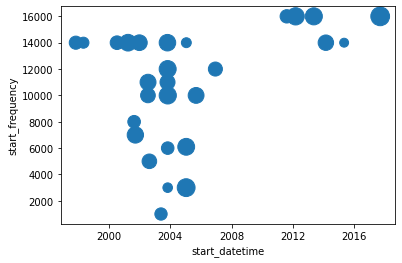

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt

# Give each flare an overall rank
matchable["overall_rank"] = list(range(1,36))

new_speed = matchable["speed"] / 9
matchable.plot.scatter(x='start_datetime', y='start_frequency', s=new_speed)
#Graph below has the top 50 solar flares plotted by date and the size of each dot is the speed of the flare. You can see that with the intensity, there is a positive tend over time.


<AxesSubplot:xlabel='start_datetime', ylabel='start_frequency'>

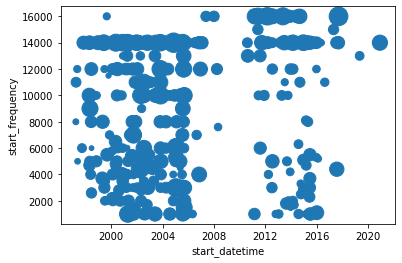

In [77]:
speeds = nasa_df.speed/9
nasa_df.plot.scatter(x='start_datetime', y='start_frequency',s=speeds)
#Same as above, but with the entire nasa dataset

<AxesSubplot:title={'center':'Top 50 Solar Flares'}, ylabel='is_flare'>

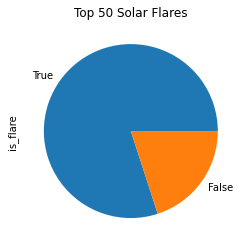

In [78]:
matchable.is_flare.value_counts().plot.pie(title="Top 50 Solar Flares")
#Below is the top 50 solar flares the top 50 solar flares for if they had a halo cme.

<AxesSubplot:title={'center':'Whole Nasa Dataset'}, ylabel='is_flare'>

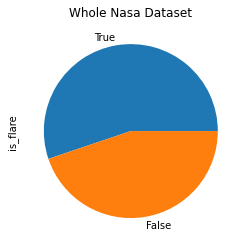

In [79]:
nasa_df.is_flare.value_counts().plot.pie(title="Whole Nasa Dataset")
#Below is the whole nasa dataset for if they have a halo cme.
#As you can see, there was a higher proportion of halo cmes in the top 50 solar flares than when compared to the whole dataset.